In [265]:
pip install wandb

In [266]:
import wandb

In [267]:
!wandb login b032cc059132c9aac4f1b317f6f9ad007ef9e4d4

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Shivam Maurya/.netrc


In [268]:
wandb.init(project="Assignment_1", name="Question_1")

## Question 1 

In [269]:
from sklearn import metrics
from keras.datasets import mnist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [270]:
from matplotlib import pyplot as plt


In [271]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [272]:
from keras.datasets import fashion_mnist

In [273]:
#Load the fashion MNIST data 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [274]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [275]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

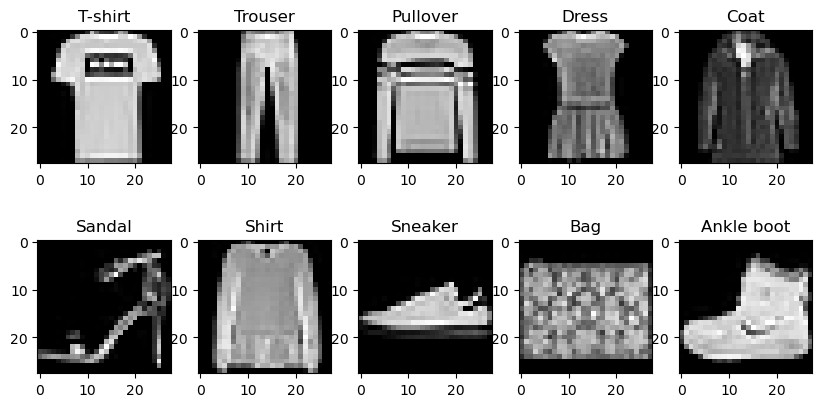

In [276]:
# Plot one sample image for each class
fig, ax = plt.subplots(2, 5, figsize=(10, 5)) #  returns a tuple containing a figure and axes object(s)
ax = ax.ravel()

for i in range(len(class_names)):
    ax[i].set_title(class_names[i])
    # Find the index of the first image with the current label
    idx = np.argmax(y_train == i) # Returns the indices of the maximum values along an axis.
    # Plotting the image
    ax[i].imshow(x_train[idx], cmap= 'gray') # display data as an image 
    wandb.log({"Question1": [wandb.Image(x_train[idx], caption= class_names[i])]})
plt.show()

In [277]:
wandb.finish()

## Question 2


In [278]:
class FFSN_MultiClass:
    def __init__(self, hidden_sizes=[3]):
        self.n_inputs = 0
        self.n_outputs= 0
        self.W = {}
        self.B = {}
        self.hidden_size = hidden_sizes
        self.n_hidden = len(hidden_sizes)
        self.sizes = []
                 
    def weights_init(self):
        
        """
        Function to initialize the weights between the layers of the network. Weights are initialized randomly.
        """
        np.random.seed(120)
        np.random.RandomState(120)
        self.sizes = [self.n_inputs] + self.hidden_size + [self.n_outputs]
        for i in range(self.n_hidden + 1):
            # Setting up the weights per layer. Initialized randomly as matrix of size of previous layer * next layer 
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            # Setting up the biases per layer. Initialized to 0 as matrix of size of 1 * next layer 
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
            
    


    def forward_pass(self, x, act_fun):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.n_hidden):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.activation_fun(act_fun,self.A[i+1])
        self.A[self.n_hidden+1] = np.matmul(self.H[self.n_hidden], self.W[self.n_hidden+1]) + self.B[self.n_hidden+1]
        self.H[self.n_hidden+1] = self.softmax(self.A[self.n_hidden+1])
        return self.H[self.n_hidden+1]
    
    def predict(self, X, act_fun):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x, act_fun)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()
    
    def softmax(self, X):
        exps = np.exp(X)
        return exps / np.sum(exps, axis=1, keepdims=True)
    
    def activation_fun(self, fun, X):
        
        if fun == "tanh":
            return self.tanh(X)
        elif fun == "relu":
            return self.relu(X)
        else:
            return self.sigmoid(X);
        
    def tanh(self, X):
        return np.tanh(X)
    
    def relu(self, X):
        return X * (X>0)
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))


    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl


    def fit(self, act_fun, X, Y):
        ny = Y.shape[1]
        self.n_inputs = X.shape[1] * X.shape[1]
        self.n_outputs = ny
        self.weights_init()
        
        
        return self.predict(X, act_fun)

In [279]:
x_train = x_train/255.0
x_test = x_test/255.0
enc = OneHotEncoder()
y_OH_train = enc.fit_transform(np.expand_dims(y_train, 1)).toarray()
y_OH_test = enc.fit_transform(np.expand_dims(y_test, 1)).toarray()
print(y_OH_train.shape, y_OH_test.shape)
print(x_train.shape)

(60000, 10) (10000, 10)
(60000, 28, 28)


In [280]:
obj = FFSN_MultiClass([150, 260, 380])
activation_name = "sigmoid"
clas_pred = obj.fit(activation_name, x_train, y_OH_train)

In [283]:
 print(clas_pred[120])

[0.         0.         0.         0.         0.         0.99889245
 0.00000002 0.         0.00000014 0.00110738]


In [284]:
print(y_OH_train[120])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Question 3